In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Data preparation

In [4]:
df = df.drop('ID',axis=1)

In [5]:
# importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [8]:
# putting feature variable to X
X = df.drop('default.payment.next.month',axis=1)
# putting response variable to y
y = df['default.payment.next.month']

In [9]:
y


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [10]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# building our first Random Forest model with default hyperparameters

In [11]:
# spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

In [13]:
# importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier()

In [14]:
#fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
# making predictions
predictions = rfc.predict(X_test)

In [16]:
# importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
# let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.63      0.37      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [18]:
# printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6647  411]
 [1232  710]]


In [19]:
print(accuracy_score(y_test,predictions))

0.8174444444444444


# HyperParameter Tunning

1.n_estimators
2.criterion
3.max_features
4.max_depth
5.min_sample_split
6.min_samples_leaf
7.min_weight_fraction_leaf
8.max_leaf_nodes
9.min_impurity_split

# tuning max_depth

let's try to find the optimum values for max_deoth and understand how the value of max_depth impacts the overall accuracy of ensemble.

In [20]:
# GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold cv
n_folds = 5

# parameter ti build the model on
parameters = {'max_depth':range(2,10,1)}


# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf,parameters,cv=n_folds,n_jobs=-1,
                  scoring ="accuracy",return_train_score=True)
rf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10)}, return_train_score=True,
             scoring='accuracy')

In [21]:
# scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.029328,0.021552,0.034401,0.005678,2,{'max_depth': 2},0.803333,0.805238,0.800476,0.795238,...,0.800381,0.003644,8,0.801429,0.801667,0.801310,0.800833,0.800238,0.801095,0.000507
1,1.242660,0.111228,0.029801,0.002482,3,{'max_depth': 3},0.808810,0.810714,0.804048,0.802619,...,0.806524,0.002972,7,0.806250,0.806786,0.807679,0.808929,0.811131,0.808155,0.001743
2,1.555019,0.090066,0.036110,0.009583,4,{'max_depth': 4},0.812143,0.814524,0.810476,0.806429,...,0.810333,0.002867,6,0.811429,0.810595,0.813274,0.813036,0.812262,0.812119,0.000999
3,1.989429,0.193384,0.041200,0.005269,5,{'max_depth': 5},0.813810,0.816667,0.815476,0.805714,...,0.812524,0.003908,5,0.816667,0.816250,0.818869,0.814702,0.816488,0.816595,0.001333
4,2.243531,0.184136,0.043303,0.006870,6,{'max_depth': 6},0.816190,0.821429,0.815714,0.811667,...,0.816000,0.003142,4,0.823929,0.824821,0.823095,0.825060,0.823036,0.823988,0.000843


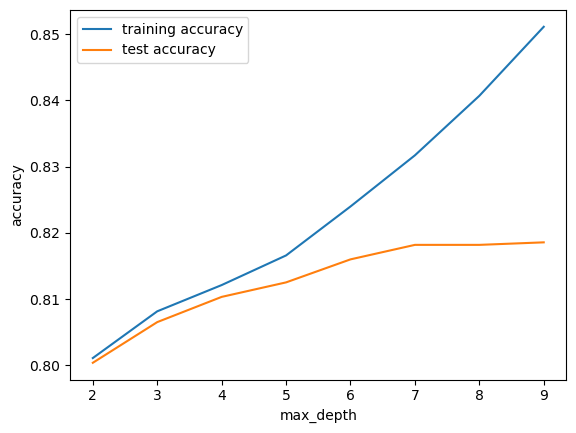

In [23]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [24]:
# GridSearchCV to find optimal n_estimators

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold cv
n_folds = 5

# parameter ti build the model on
parameters = {'n_estimators':range(100,1000,150)}


# instantiate the model
rf = RandomForestClassifier(max_depth=5)

# fit tree on training data
rf = GridSearchCV(rf,parameters,cv=n_folds,n_jobs=-1,
                  scoring ="accuracy",return_train_score=True)
rf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 150)},
             return_train_score=True, scoring='accuracy')

In [25]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.012139,0.152032,0.037001,0.004859,100,{'n_estimators': 100},0.813571,0.815952,0.815238,0.808095,...,0.812762,0.002899,2,0.815536,0.814702,0.817738,0.816310,0.819167,0.816690,0.001591
1,4.665366,0.299622,0.087002,0.015835,250,{'n_estimators': 250},0.815238,0.814762,0.812381,0.807381,...,0.812190,0.002831,5,0.817798,0.816190,0.816667,0.815298,0.816310,0.816452,0.000810
2,24.018375,6.648554,0.960836,0.082851,400,{'n_estimators': 400},0.814048,0.814048,0.815000,0.807381,...,0.812190,0.002859,5,0.815893,0.815714,0.820238,0.815952,0.815119,0.816583,0.001851
3,53.857790,5.812183,1.291494,0.012414,550,{'n_estimators': 550},0.815714,0.815238,0.812619,0.807857,...,0.812571,0.002847,3,0.818810,0.813988,0.816905,0.816369,0.816726,0.816560,0.001540
4,73.422607,2.667523,1.083393,0.186051,700,{'n_estimators': 700},0.815476,0.816190,0.813810,0.808095,...,0.813095,0.002904,1,0.819464,0.815536,0.816726,0.815952,0.816488,0.816833,0.001379


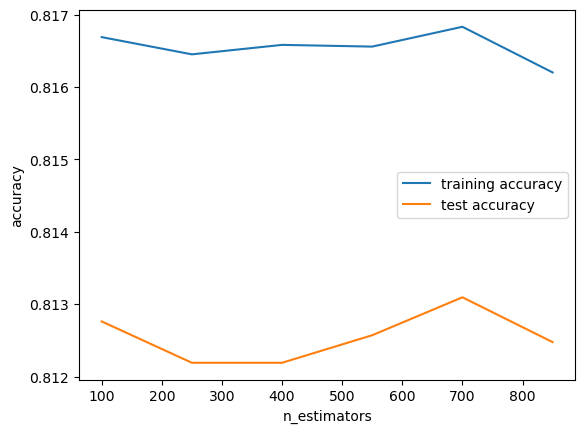

In [26]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [34]:
# GridSearchCV to find optimal max_features

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold cv
n_folds = 5

# parameter ti build the model on
parameters = {'max_features':[5,10,1]}


# instantiate the model
rf = RandomForestClassifier(max_depth=5 ,n_estimators=300)

# fit tree on training data
rf = GridSearchCV(rf,parameters,cv=n_folds,n_jobs=-1,
                  scoring ="accuracy",return_train_score=True)
rf.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=300),
             n_jobs=-1, param_grid={'max_features': [5, 10, 1]},
             return_train_score=True, scoring='accuracy')

In [35]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.053170,0.178602,0.601914,0.044602,5,{'max_features': 5},0.816905,0.820714,0.816905,0.815000,...,0.817857,0.002087,2,0.823810,0.822024,0.822440,0.823333,0.824048,0.823131,0.000780
1,53.673570,0.451741,0.258355,0.023851,10,{'max_features': 10},0.818333,0.820000,0.819286,0.818333,...,0.819095,0.000663,1,0.824226,0.822381,0.823512,0.823929,0.824107,0.823631,0.000670
2,12.031289,0.685161,0.597864,0.225135,1,{'max_features': 1},0.797381,0.796667,0.797619,0.790238,...,0.795000,0.002885,3,0.797857,0.797857,0.797024,0.799226,0.798512,0.798095,0.000737


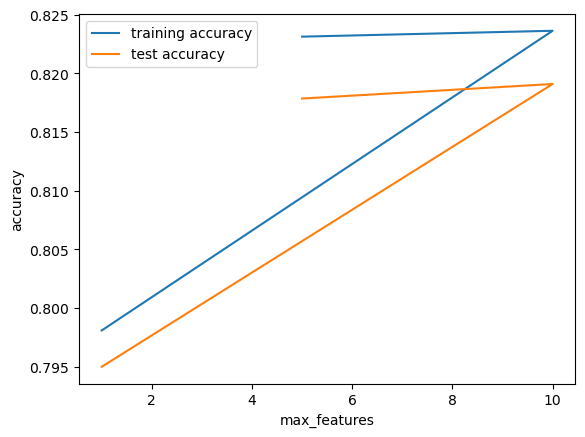

In [36]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [37]:
# GridSearchCV to find optimal min_samples_leaf

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold cv
n_folds = 5

# parameter ti build the model on
parameters = {'min_samples_leaf':range(100,400,100)}


# instantiate the model
rf = RandomForestClassifier(max_depth=5 ,n_estimators=300)

# fit tree on training data
rf = GridSearchCV(rf,parameters,cv=n_folds,n_jobs=-1,
                  scoring ="accuracy",return_train_score=True)
rf.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=300),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 100)},
             return_train_score=True, scoring='accuracy')

In [38]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.738294,0.877827,0.622948,0.130913,100,{'min_samples_leaf': 100},0.812143,0.813333,0.810952,0.806190,...,0.810095,0.002671,1,0.813929,0.811310,0.812083,0.813750,0.813810,0.812976,0.001075
1,27.808842,0.591565,0.534909,0.100005,200,{'min_samples_leaf': 200},0.810714,0.812619,0.810476,0.805000,...,0.809286,0.002673,2,0.809821,0.808869,0.810000,0.810655,0.811667,0.810202,0.000929
2,16.760055,8.125572,0.437511,0.265746,300,{'min_samples_leaf': 300},0.810238,0.811429,0.807857,0.804286,...,0.808048,0.002571,3,0.808452,0.808214,0.807500,0.810298,0.809464,0.808786,0.000984


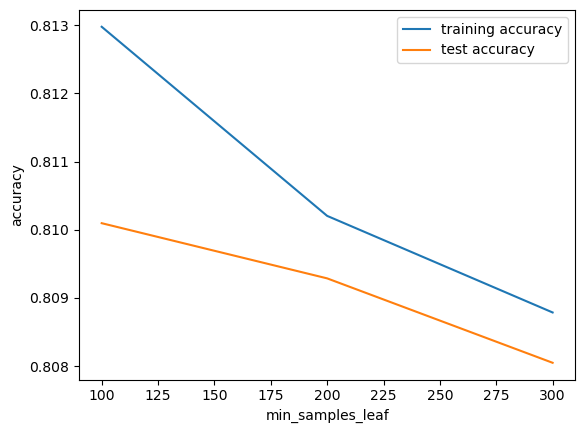

In [39]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [40]:
# GridSearchCV to find optimal min_samples_split

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold cv
n_folds = 5

# parameter ti build the model on
parameters = {'min_samples_split':range(200,500,100)}


# instantiate the model
rf = RandomForestClassifier(max_depth=5 ,n_estimators=300)

# fit tree on training data
rf = GridSearchCV(rf,parameters,cv=n_folds,n_jobs=-1,
                  scoring ="accuracy",return_train_score=True)
rf.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=300),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 100)},
             return_train_score=True, scoring='accuracy')

In [41]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.576991,0.575231,0.600104,0.057400,200,{'min_samples_split': 200},0.814762,0.815952,0.813571,0.806667,...,0.812143,0.003437,1,0.815774,0.814107,0.814345,0.813750,0.813988,0.814393,0.000717
1,30.598109,0.780370,0.637926,0.041405,300,{'min_samples_split': 300},0.811667,0.813333,0.811905,0.806190,...,0.810286,0.002623,3,0.812321,0.811488,0.812619,0.813929,0.813036,0.812679,0.000805
2,18.262072,9.454737,0.398454,0.238244,400,{'min_samples_split': 400},0.813571,0.814524,0.814048,0.805714,...,0.810952,0.003821,2,0.812024,0.809940,0.814940,0.813571,0.811845,0.812464,0.001691


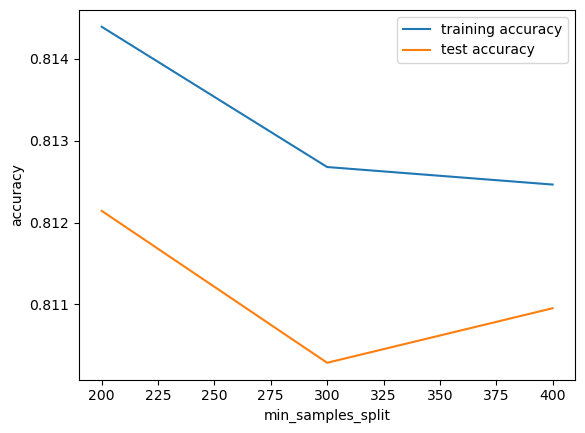

In [42]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [86]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth= 5, 
                             max_features= 9, 
                             min_samples_leaf= 200,
                             min_samples_split= 300, 
                             n_estimators=300)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=9, min_samples_leaf=200,
                       min_samples_split=300, n_estimators=300)

In [87]:
predictions = rfc.predict(X_test)

In [88]:
#evalution metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [89]:
print(confusion_matrix(y_test,predictions))

[[6742  316]
 [1247  695]]


In [90]:
print(accuracy_score(y_test,predictions))

0.8263333333333334


In [51]:
param_grid = {
    'max_depth':[3,8,1],
    'min_samples_leaf':range(100,400,100),
    'min_samples_split':range(200,500,100),
    'n_estimators':[100,1000,150],
    'max_features':[5,10,1]
}
rf = RandomForestClassifier()

grid_search = GridSearchCV( estimator = rf,param_grid = param_grid,cv=3,n_jobs=-1,
                  scoring ="accuracy",return_train_score=True ,verbose = 1)


In [52]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [53]:
# printing the optimal accuracy score and hyperparemeters
print('we can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)



we can get accuracy of 0.8184285714285714 using {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 1000}


In [58]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth= 3, 
                             max_features= 10, 
                             min_samples_leaf= 100,
                             min_samples_split= 300, 
                             n_estimators=1000)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=10, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=1000)

In [60]:
predictions = rfc.predict(X_test)

In [61]:
#evalution metrics
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [63]:
print(confusion_matrix(y_test,predictions))

[[6757  301]
 [1261  681]]


In [64]:
print(accuracy_score(y_test,predictions))

0.8264444444444444
